In [327]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 200)

In [328]:
df = pd.read_csv('C:\\Users\\xzhao\\Data\\diabetes.csv')

In [329]:
df = df[df['Glucose']!=0]
df = df[df['BloodPressure']!=0]

# mdf = mdf.reindex()

In [330]:
# df.corr()

In [331]:
mdf = df.copy()
mdf.shape

(728, 9)

In [353]:
mdf.query('SkinThickness == 0')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [332]:
def understand(feature):
    
    print('unique value', mdf[feature].nunique())
    print('empty records:', mdf[df[feature].isna()])
    print('data description:',mdf[feature].describe())
    sns.set(rc={'figure.figsize':(20,5)})
    if mdf[feature].nunique()<20:
        sns.countplot(x=feature, hue='Outcome',data=mdf)
    else:
        bin_size = int(mdf[feature].nunique()/20)
        group_feature = pd.qcut(mdf[feature], q=20, duplicates='drop')
        sns.countplot(x=group_feature,hue='Outcome',data=mdf)

unique value 17
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean       3.862637
std        3.363422
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


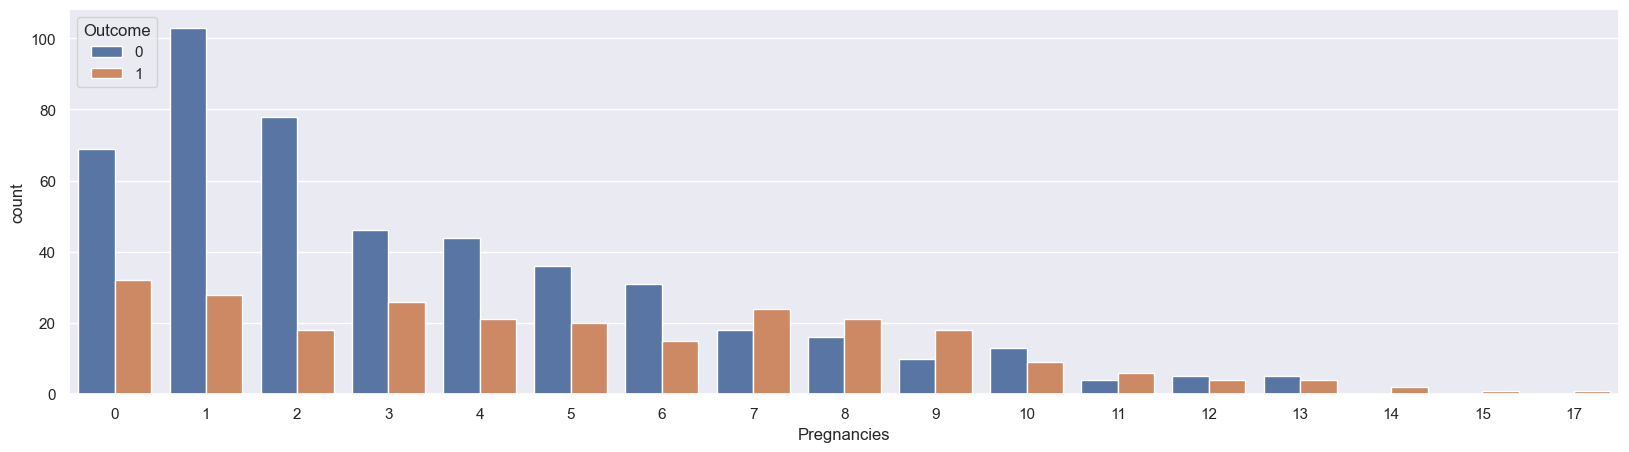

In [333]:
understand('Pregnancies')

unique value 135
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean     121.873626
std       30.679207
min       44.000000
25%      100.000000
50%      117.000000
75%      141.250000
max      199.000000
Name: Glucose, dtype: float64


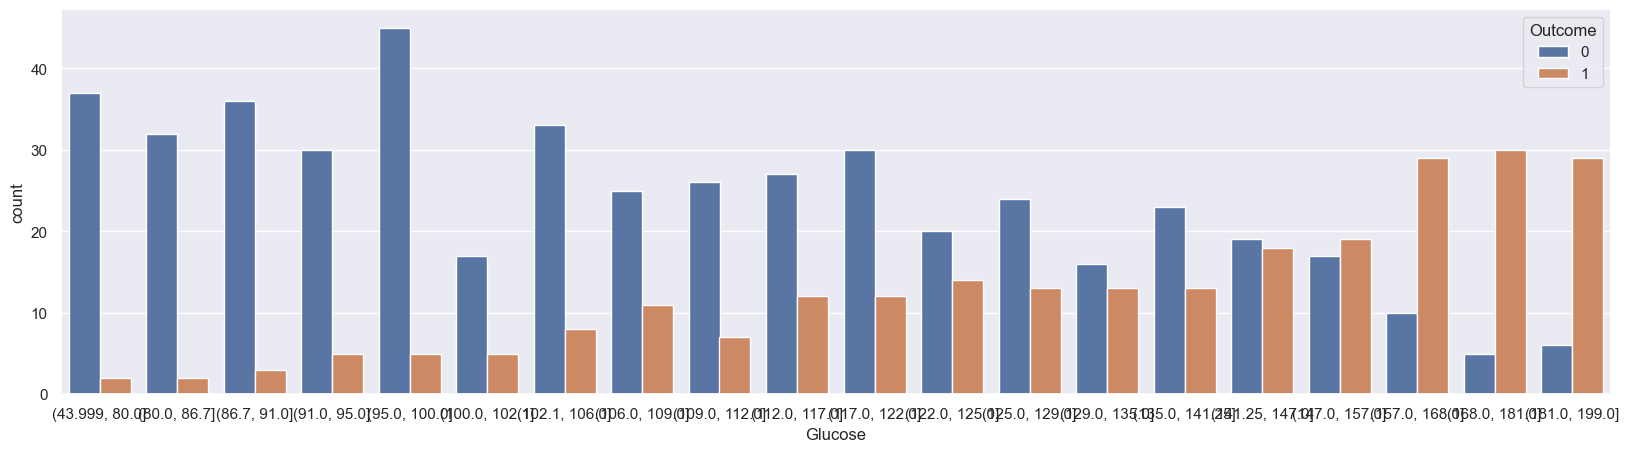

In [334]:
understand('Glucose')

unique value 46
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean      72.438187
std       12.386109
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


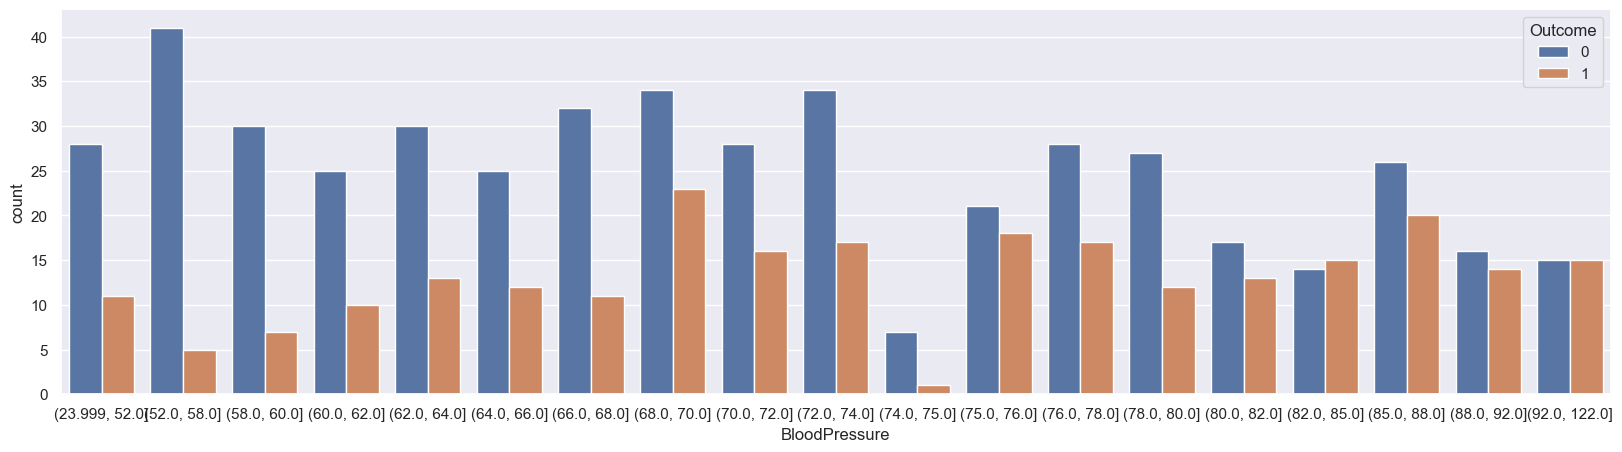

In [335]:
understand('BloodPressure')

unique value 51
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean      21.388736
std       15.729793
min        0.000000
25%        0.000000
50%       24.000000
75%       33.000000
max       99.000000
Name: SkinThickness, dtype: float64


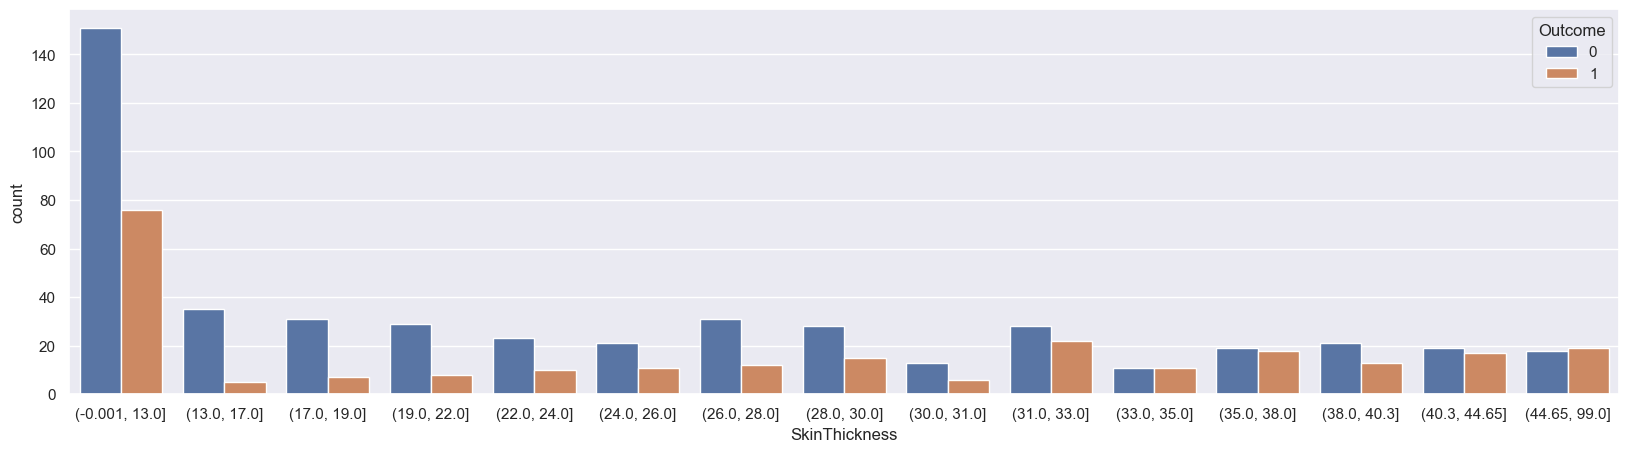

In [336]:
understand('SkinThickness')

unique value 186
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean      84.152473
std      116.819934
min        0.000000
25%        0.000000
50%       48.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64


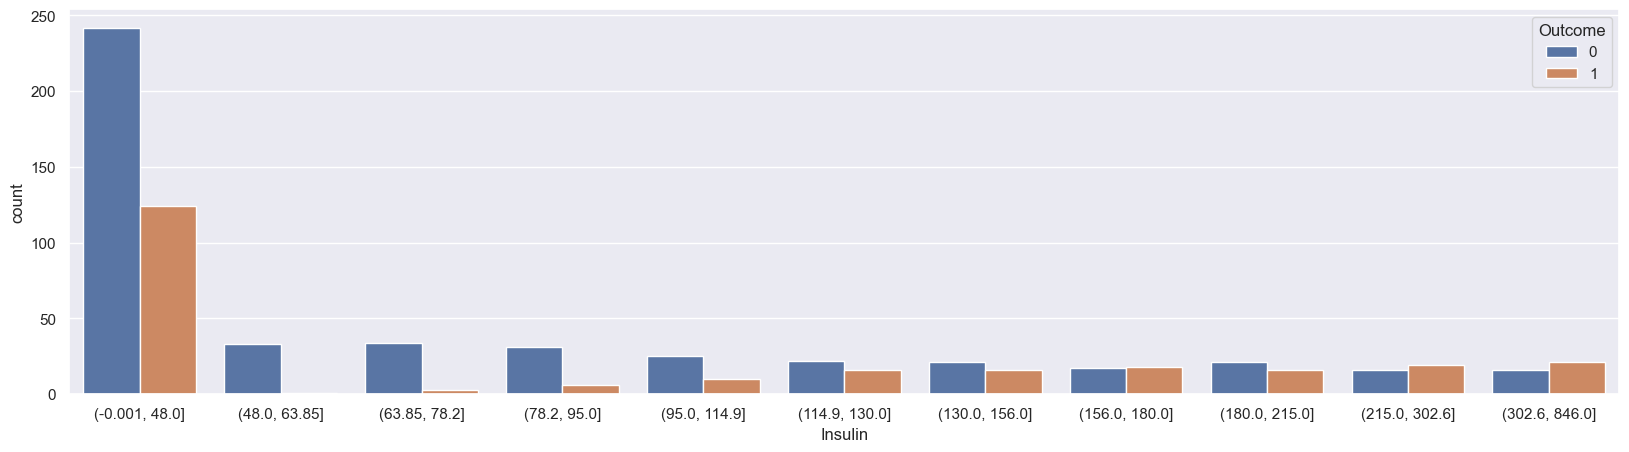

In [337]:
understand('Insulin')

unique value 246
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean      32.288736
std        7.277660
min        0.000000
25%       27.400000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


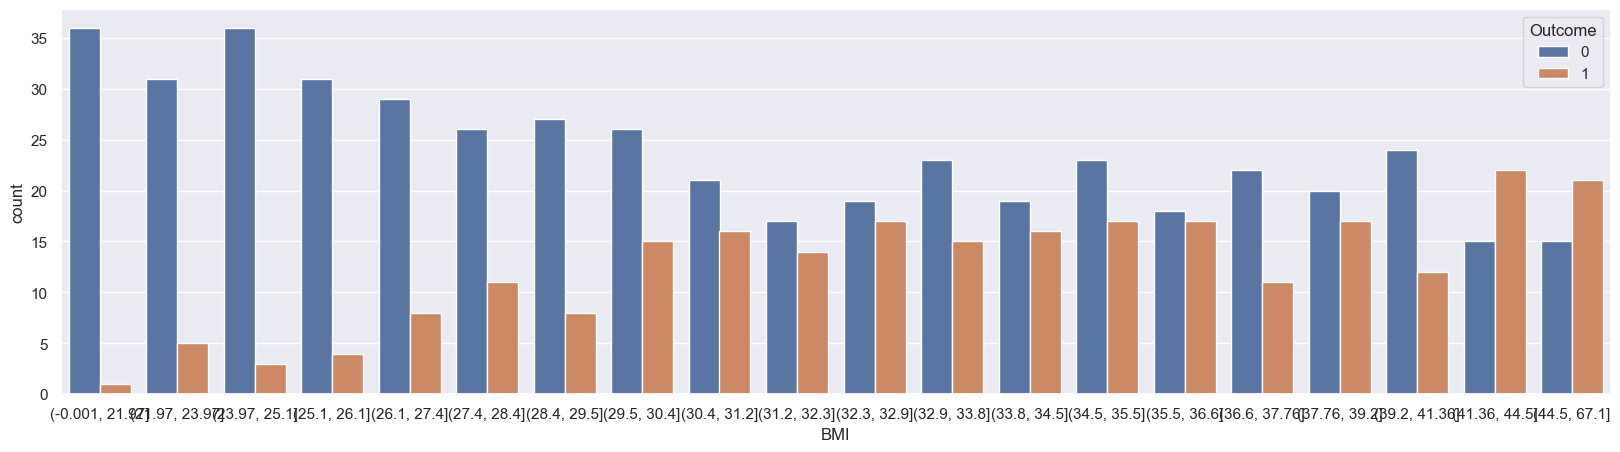

In [338]:
understand('BMI')

unique value 502
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean       0.476518
std        0.334851
min        0.078000
25%        0.245000
50%        0.380000
75%        0.629500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


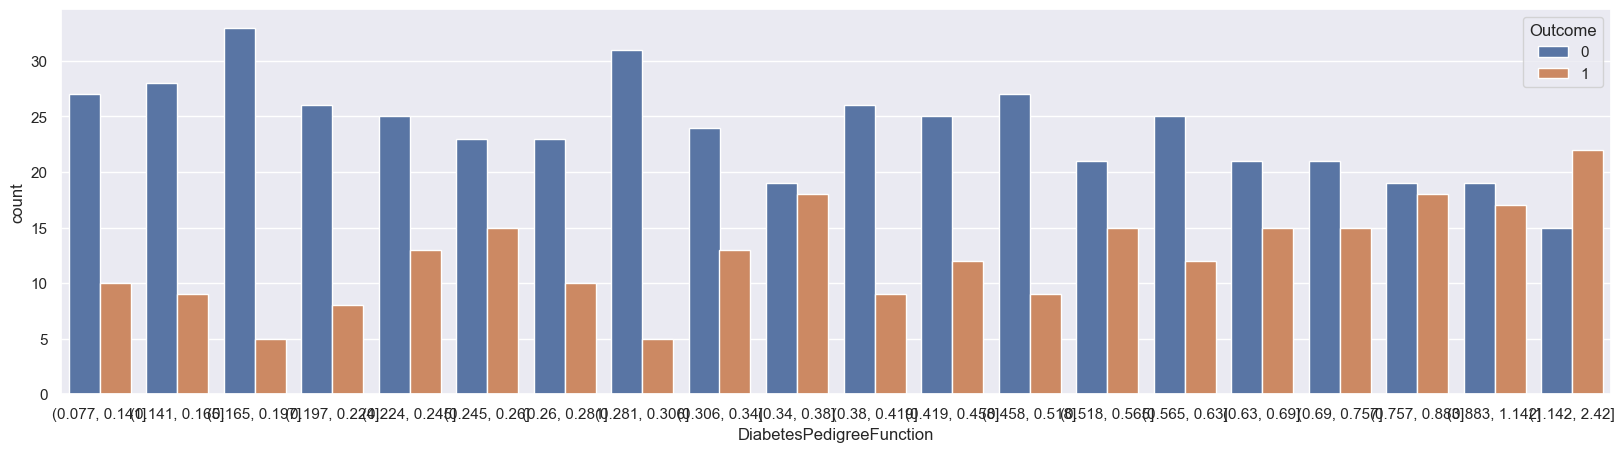

In [339]:
understand('DiabetesPedigreeFunction')

unique value 51
empty records: Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
data description: count    728.000000
mean      33.394231
std       11.849692
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


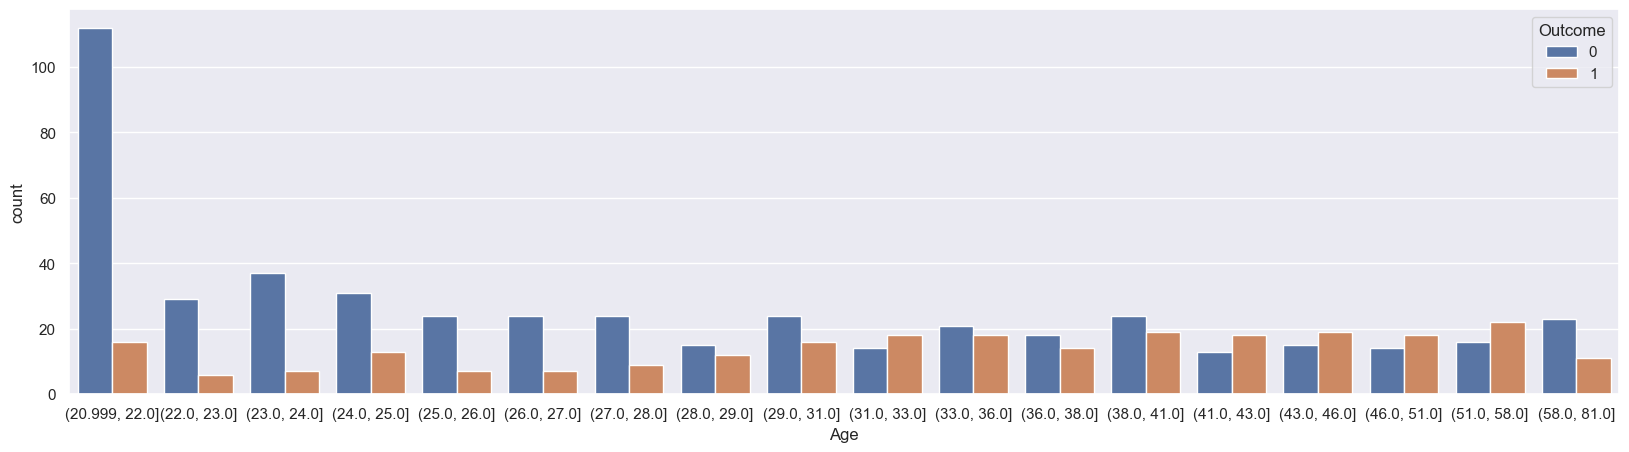

In [340]:
understand('Age')

In [341]:
mdf['Outcome'].mean()

0.3434065934065934

In [342]:
i = 1000
from sklearn.model_selection import train_test_split
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(mdf, y, test_size=0.15, random_state=i)
X_train, X_valid, y_train, y_valid = train_test_split(x_trainvalid, y_trainvalid, test_size=0.175, random_state=i)
print(y_train.mean(),y_valid.mean(),y_test.mean())
print(len(y_train),len(y_valid),len(y_test))

0.33595284872298625 0.3577981651376147 0.36363636363636365
509 109 110


## target encoding

In [343]:
mdf.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [344]:
import category_encoders as ce

cat_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
            #, 'Outcome'
           ]

def targetC(data):
    y = data['Outcome']
    encoder = ce.TargetEncoder(cols=cat_list)
    data_encoded = encoder.fit_transform(data, y)

In [345]:
targetC(X_train)

In [346]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
117,0.356778,0.327716,0.327716,0.376289,0.358209,0.390216,0.294694,0.299443,0
31,0.361014,0.437523,0.446169,0.424205,0.428835,0.417790,0.428835,0.287864,1
338,0.550020,0.411707,0.375170,0.350720,0.428835,0.379654,0.428835,0.447595,1
516,0.550020,0.411707,0.403532,0.350720,0.369711,0.428835,0.428835,0.426701,1
323,0.368640,0.411707,0.429507,0.396703,0.428835,0.327716,0.428835,0.510224,1
...,...,...,...,...,...,...,...,...,...
527,0.361014,0.308445,0.333768,0.247033,0.270422,0.298726,0.298726,0.174421,0
277,0.316840,0.374383,0.306069,0.263121,0.294694,0.269861,0.298726,0.202802,0
419,0.361014,0.366119,0.306069,0.372497,0.341414,0.341851,0.365620,0.287864,1
329,0.327284,0.314448,0.402059,0.409148,0.298726,0.313142,0.298726,0.322431,0


In [348]:
X_valid

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,0.213742,0.269861,0.298726,0.376289,0.358209,0.294694,0.280760,0.227544,0
5,0.356778,0.308445,0.333768,0.376289,0.358209,0.308445,0.298726,0.280286,0
148,0.356778,0.361646,0.375170,0.376289,0.358209,0.390216,0.294694,0.290362,0
25,0.379522,0.398894,0.402059,0.356085,0.341414,0.428835,0.365620,0.455293,1
181,0.316840,0.350720,0.306069,0.271703,0.290362,0.374383,0.298726,0.202802,0
...,...,...,...,...,...,...,...,...,...
668,0.327284,0.290362,0.213123,0.396703,0.327716,0.341414,0.294694,0.510224,0
369,0.213742,0.353731,0.428835,0.296703,0.285393,0.340891,0.365620,0.482254,1
364,0.323300,0.361646,0.333768,0.331003,0.365620,0.374383,0.298726,0.280286,0
136,0.316840,0.280839,0.402059,0.356085,0.290362,0.313142,0.298726,0.086229,0


In [349]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
35,4,103,60,33,192,24.0,0.966,33,0
272,3,122,78,0,0,23.0,0.254,40,0
372,0,84,64,22,66,35.8,0.545,21,0
325,1,157,72,21,168,25.6,0.123,24,0
3,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
595,0,188,82,14,185,32.0,0.682,22,1
319,6,194,78,0,0,23.5,0.129,59,1
403,9,72,78,25,0,31.6,0.280,38,0
310,6,80,66,30,0,26.2,0.313,41,0
